In [3]:
import cv2
import imutils
import matplotlib.pyplot as plt
import os
import numpy as np

In [4]:
# Load merged data
loaded_x_input = np.load("prepared_data/x_input_combined.npy")
loaded_y_output = np.load("prepared_data/y_output_combined.npy")

In [5]:
def plot_last_images(X, y, n=30):
    """
    Plots the last n sample images for each unique label in y.
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """
    
    # Define a mapping from label to string representation
    label_to_str = {0: "No Tumor", 1: "Glioma", 2: "Meningioma", 3: "Pituitary"}
    
    # Iterate over all unique labels in y
    for label in np.unique(y):
        # Grab the last n images with the corresponding y values equal to label
        images = X[np.argwhere(y == label)]
        n_images = images[-n:]  # Select the last n images
        
        columns_n = 10
        rows_n = int(np.ceil(n / columns_n))

        plt.figure(figsize=(20, 10))
        
        i = 1  # Current plot        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            # Remove ticks
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False, labelright=False)
            
            i += 1
        
        plt.suptitle(f"Tumor Type: {label_to_str[label]}")
        plt.show()


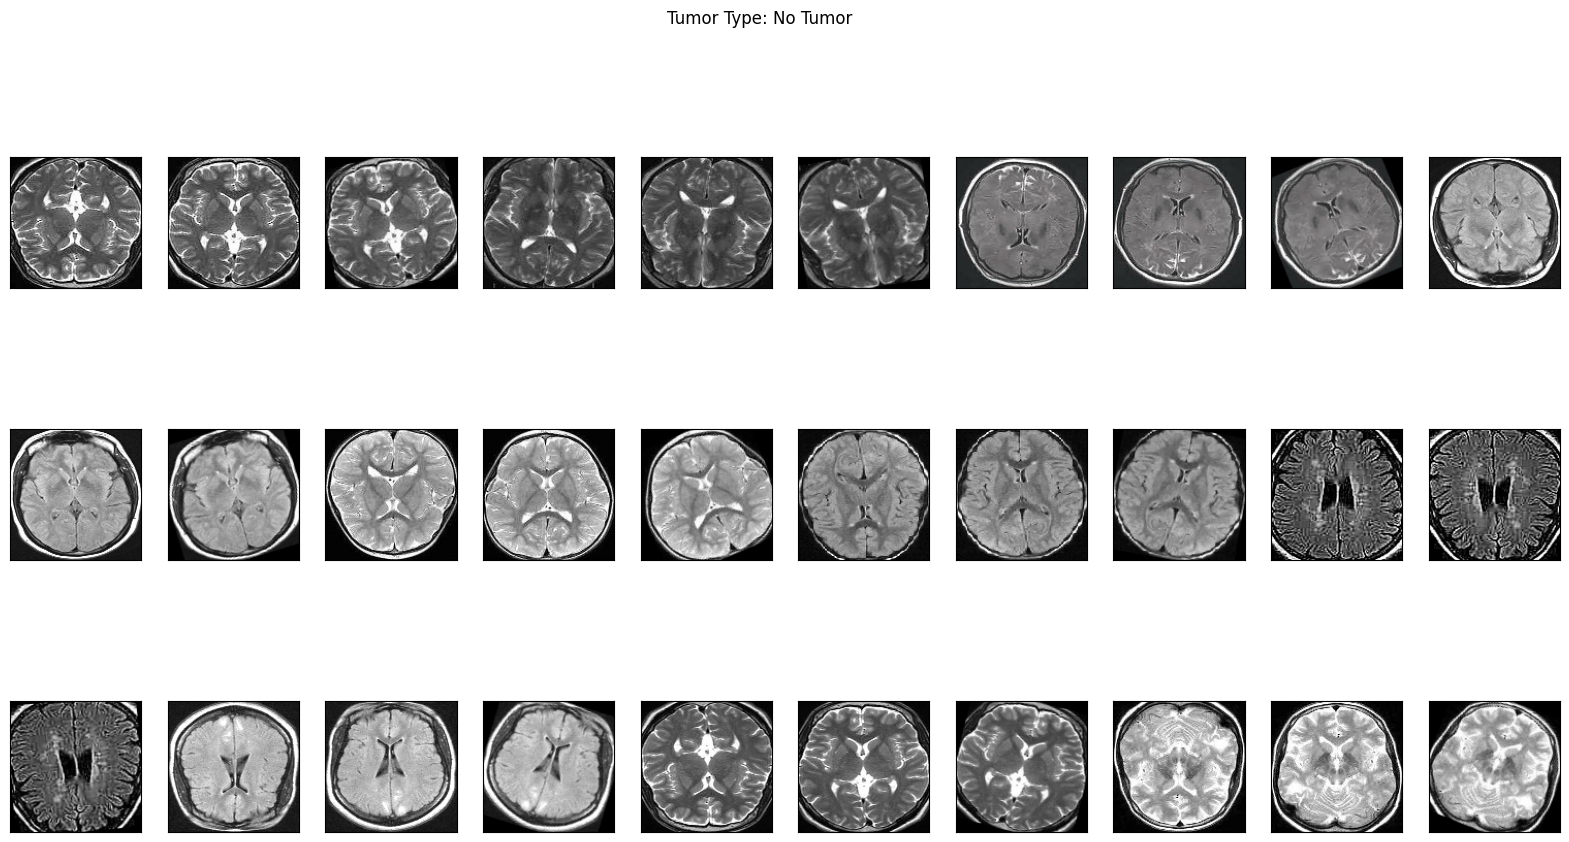

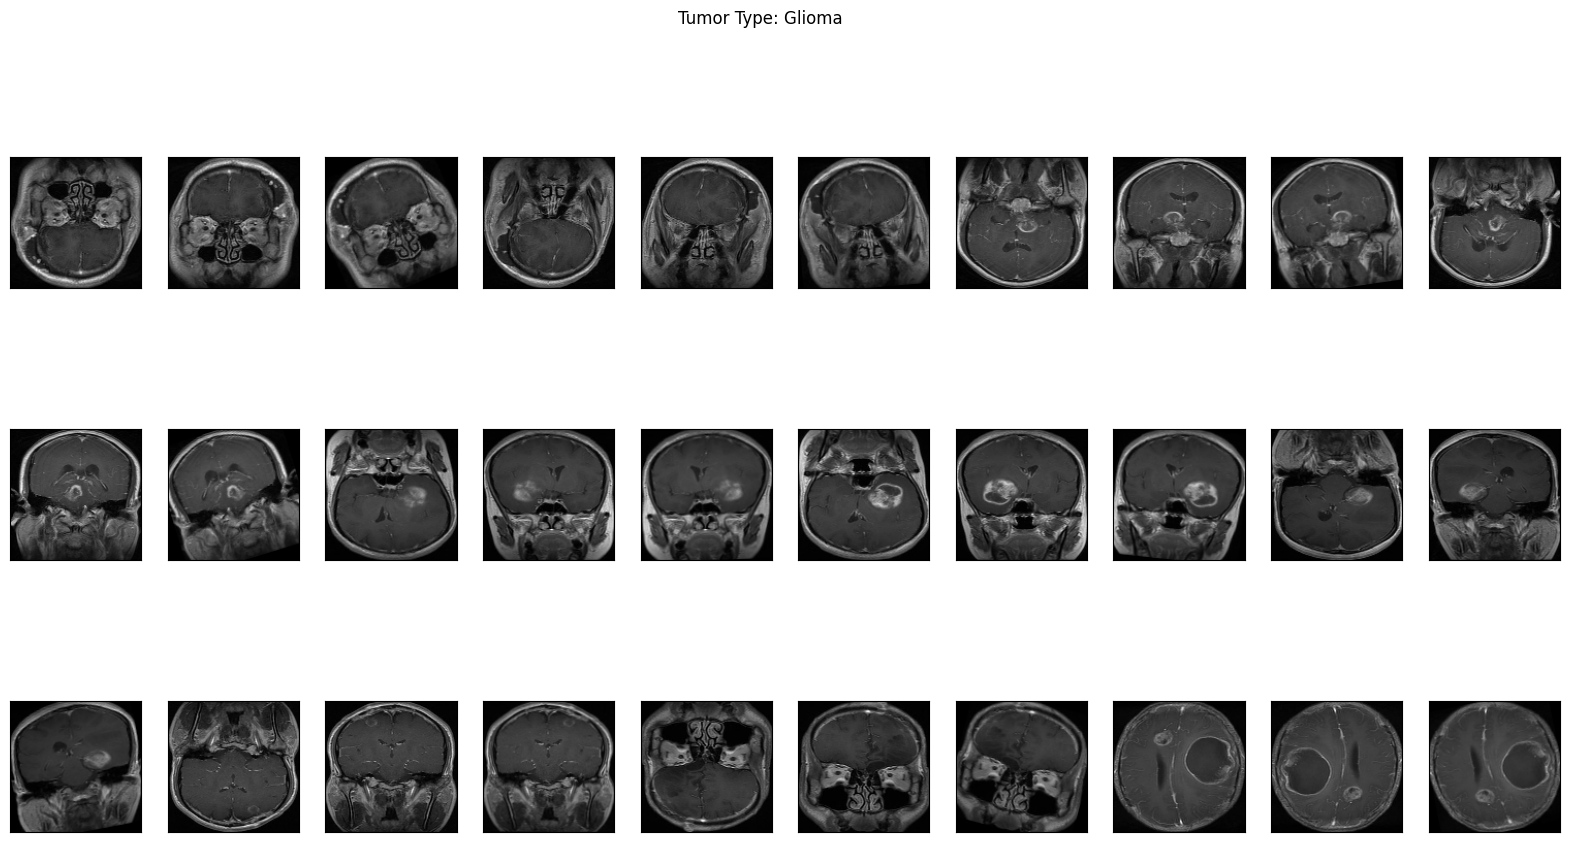

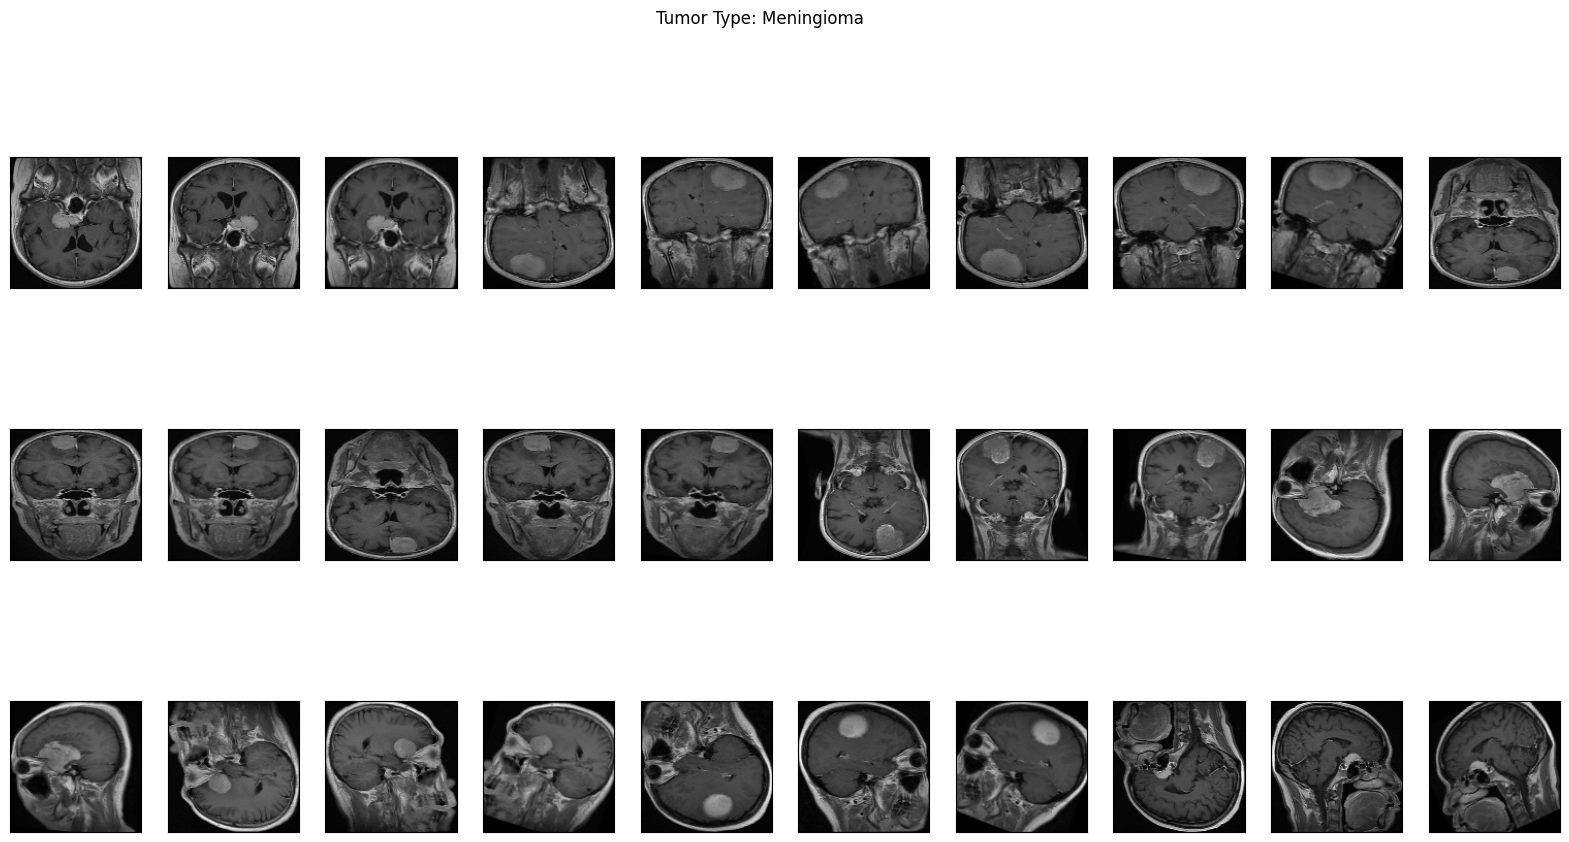

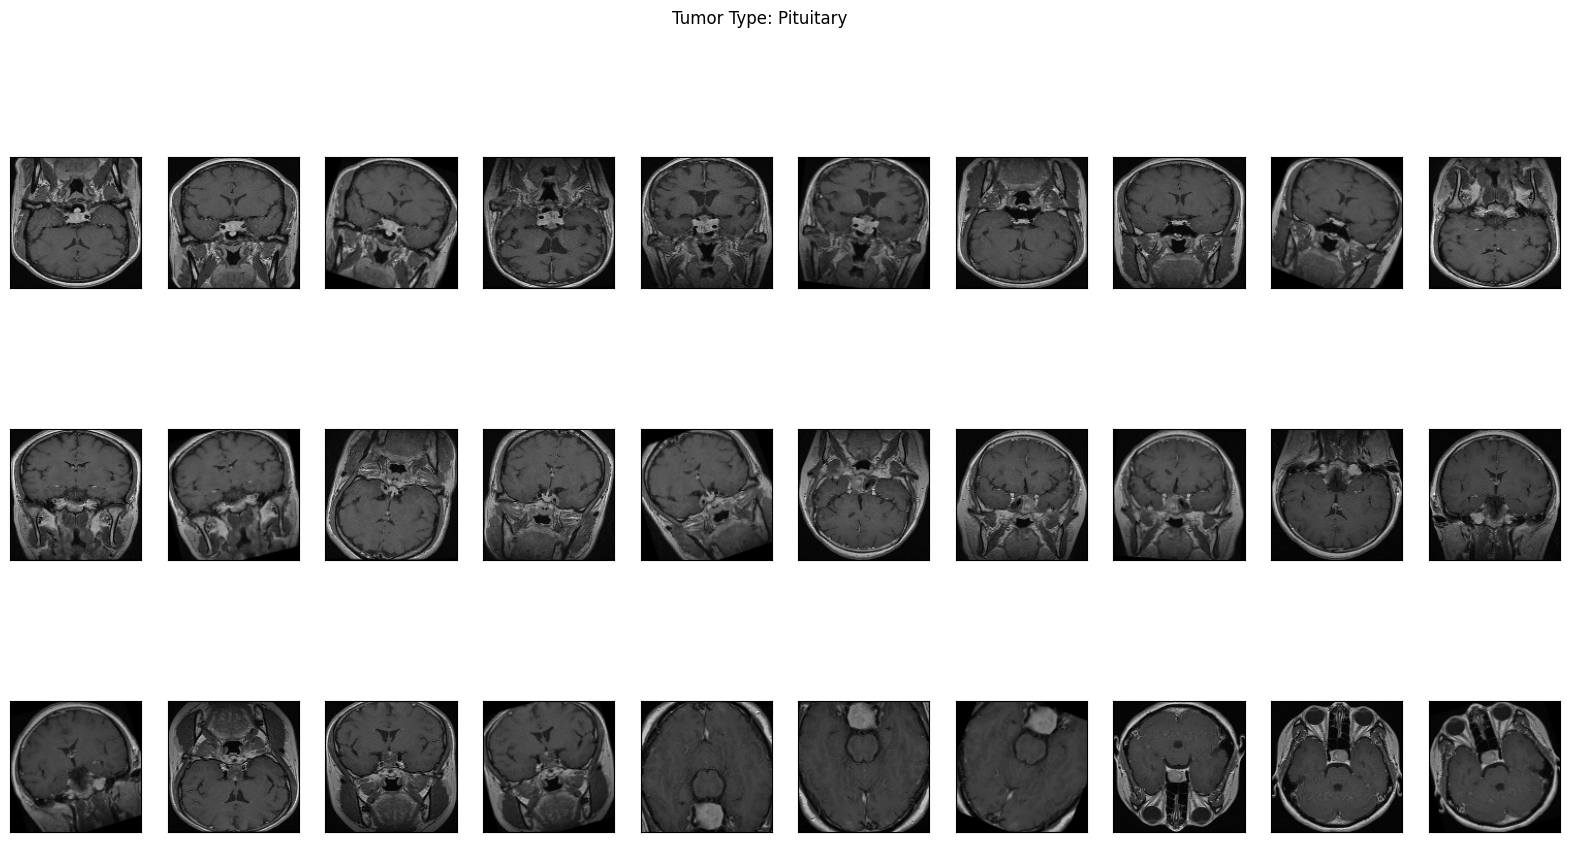

In [6]:
plot_last_images(loaded_x_input, loaded_y_output)